Amaan Hassanali (with some help from Sarah Teng & Anika Vaishampayan)
PIC 16A
Homework 5
11/15/2020

I affirm that I personally wrote the text, code, and comments in this homework assignment.

# Homework 5

## Problem 1: Faceted Histogram

Run the following code block to define a function which generates two 1-dimensional `numpy` arrays. The first array, called `groups`, consists of integers between `0` and `n_groups-1`, inclusive. The second array, called `data`, consists of real numbers. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def create_data(n, n_groups):
    """
    generate a set of fake data with group labels. 
    n data points and group labels are generated. 
    n_groups controls the number of distinct groups. 
    Returns an np.array() of integer group labels and an 
    np.array() of float data. 
    """
    
    # random group assignments as integers between 0 and n_groups-1, inclusive
    groups = np.random.randint(0, n_groups, n)
    
    # function of the groups plus gaussian noise (bell curve)
    data   = np.sin(groups) + np.random.randn(n)
    
    return(groups, data)

## Part A

Write a function called `facet_hist()`. This function should accept five arguments: 

1. `groups`, the `np.array` of group labels as output by `create_data()`. 
2. `data`, the `np.array` of data as output by `create_data()`.
3. `m_rows`, the number of desired rows in your faceted histogram (explanation coming). 
4. `m_cols`, the number of desired columns in your faceted histogram (explanation coming). 
5. `figsize`, the size of the figure. 

Your function will create faceted histograms -- that is, a separate axis and histogram for each group. For example, if there are six groups in the data, then you should be able to use the call 

```
facet_hist(groups, data, m_rows = 2, m_cols = 3, figsize = (6,4))
```

to create a plot like this: 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram.png
" alt="An array of six histograms, depicting bell-curve data, with two rows and three columns. Each histogram is labeled with one of the six group labels." width="400px">
</figure>

It's fine if your group labels run left-to-right (so that the top row has labels 0, 1, and 2 rather than 0, 2, 4). 


You should also be able to change the orientation by modifying `m_rows`, `m_cols`, and `figsize`. 

```
facet_hist(groups, data, m_rows = 3, m_cols = 2, figsize = (4,6))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_2.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels." width="300px">
</figure>

### Requirements: 

1. Your function should work **whenever `m_rows*m_cols` is equal to the total number of groups.** Your function should first check that this is the case, and raise an informative `ValueError` if not. You may assume that there is at least one data point for each group label in the data supplied. 
2. You should include a horizontal axis label (of your choice) along **only the bottom row** of axes. 
3. You should include a vertical axis label (e.g. "Frequency") along **only the leftmost column of axes.**
4. Each axis should have an axis title of the form "Group X", as shown above. 
5. Comments and docstrings! 

### Hints

- If your plots look "squished," then `plt.tight_layout()` is sometimes helpful. Just call it after constructing your figure, with no arguments. 
- Integer division `i // j` and remainders `i % j` are helpful here.  


I had started this assignment before we learnt subplots, so I was quite lost on the first day and struggled with making histograms. Luckily, lecture was the next day and I managed to watch the videos and understand how to do basic plots. After a quick run-through of this question, the wording was extremely confusing, so I had to write down exactly what I needed to do. Once I figured out the fundamentals, it was not too difficult to implement a function. I created most of it, but I was still confused about one matter: What data is to be plotted? The professor offered help and I managed to figure out what to do conceptually. However, the code had yet to be formed. My group members came in as a blessing and we managed to figure out how to use dictionaries to plot data in the histograms. A minor issue was setting up group names/numbers for each graph because the ax array was multidimensional but I decided to utilize an extra variable that increments inside the loop as somewhat of a counter. A few tries later, and the code worked.
For part B, I had to look back to our lecture on keyword arguments as I forgot how to implement them exactly. Once done, I simply modified the code from part A accordingly.

In [258]:
# your function facet_hist() here
def facet_hist(groups, data, m_rows, m_cols, figsize, **kwargs):
    """
    The function takes 5 arguments (and eventually **kwargs for the next part) in as inputs.
    It checks if the product of rows and columns are not equal to the size of groups and if so, returns a ValueError.
    It then created a set of subplots corresponding to the input rows and columns.
    Each axis in the figure is then 'made into' a histogram with appropriate x and y labels.
    For the next part, the axis.hist is modified to include **kwargs.
    After, group names are given to each graph.
    """
    #Error Handling
    if m_rows*m_cols != len(set(groups)):
        raise ValueError("Error: rows and columns are not equal to total number of groups!")
    
    #Constructing figure and axes
    fig, ax = plt.subplots(m_rows, m_cols, figsize = figsize)
    
    D = {} #Empty dictionary
    for i in range(len(data)):
        D.setdefault(groups[i], []).append(data[i]) #Dictionary with data for each group
    
    z = 0 #Extra variable that increments to get data per group
    for axis in ax.flat:
        axis.hist(D[z], alpha = kwargs["alpha"], color = kwargs["color"])
        #axis.hist(D[z]) #Histogram with appropriate data for part A
        z += 1
        axis.set(xlabel = "Values") #Setting xlabel
        axis.set(ylabel = "Frequency") #Setting ylabel
        axis.label_outer() #Placing xlabel and ylabel on their respective edges
    
    k = 0 #Extra variable for the group names
    for row in range(m_rows):
        for col in range(m_cols):
            ax[row][col].set_title("Group " + str(k)) #Title is "Group" + number/variable k
            k += 1

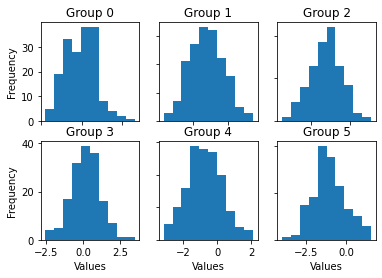

In [254]:
# test code -- run this!
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4))

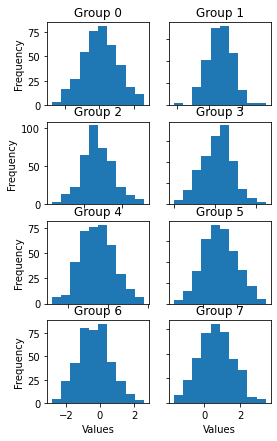

In [255]:
# test code -- run this!
groups, data = create_data(3000, 8)
facet_hist(groups, data, 4, 2, figsize = (4, 7))

## Part B

Modify your function (it's ok to modify it in place, no need for copy/paste) so that it accepts additional `**kwargs` passed to `ax.hist()`. For example,  

```
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")
```

should produce 

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/faceted_histogram_3.png
" alt="An array of six histograms, depicting bell-curve data, with three rows and two columns. Each histogram is labeled with one of the six group labels. The histograms are now colored pink and are slightly transparent.|" width="400px">
  <figcaption><i>Example output.</i></figcaption>
</figure>

You should be able to run this code **without defining parameters `alpha` and `color` for `facet_hist()`**. 

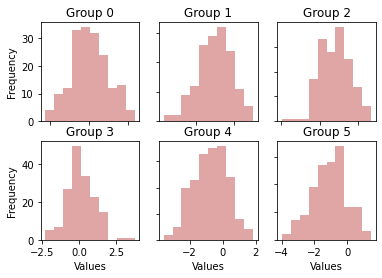

In [260]:
# test code -- run this! 
groups, data = create_data(1000, 6)
facet_hist(groups, data, 2, 3, figsize = (6, 4), alpha = .4, color = "firebrick")

## Problem 2: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2019 World Happiness Report. 

In [196]:
import urllib
import pandas as pd
def retrieve_data(url):
    """
    Retrieve a file from the specified url and save it in a local file 
    called data.csv. The intended values of url are:     
    """
    
    # grab the data and parse it
    filedata = urllib.request.urlopen(url) 
    to_write = filedata.read()
    
    # write to file
    with open("data.csv", "wb") as f:
        f.write(to_write)
        
retrieve_data("https://philchodrow.github.io/PIC16A/datasets/world_happiness_report/2019.csv")
happiness = pd.read_csv("data.csv")
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


What you're seeing right now is a `pandas` data frame. You don't have to know what that is right now -- no worries! Just observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

### Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

The code below was quite simple to implement and follows almost directly from the examples done in class.

[Text(0, 0.5, 'Happiness score'), Text(0.5, 0, 'Healthy life expectancy')]

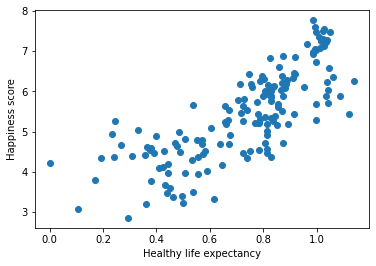

In [70]:
# your plotting code here
fig, ax = plt.subplots(1, 1) #Create a figure with one axis
ax.scatter(happiness["Healthy life expectancy"], happiness["Score"]) #Plotting Healthy Life Expectancy against Score
ax.set(xlabel = "Healthy life expectancy", ylabel = "Happiness score") #Setting appropriate labels

Discussion:
It is clear that as there is a somewhat linear or arguably exponential relationship between healthy life expectancy and the happiness score; that is, for higher healthy life expectancies, there is a higher score, and this score seems to be moving upward at an increasing rate for substantially higher life expectancies. Economically speaking, higher life expectancy is often associated with economic development, better healthcare, as well as low poverty and crime rates. Although an argument can be made for shorter lives still equating to happiness, people in general are happier when they live longer. Indeed, this is represented more than adequately by the correlation above.

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Write a function called `scatterplot_matrix()`, with arguments `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. Your function should create a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. Some analysts prefer to remove half the plots to avoid redundancy, but you don't have to bother with that. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

Don't forget comments and docstrings! 

For this part, I needed to understand how to make a matrix however, thanks to my experience with C++ and Java, as well as the work above, matrix entries are simple an array from two summands (i.e. rows and columns). By that logic, it wasn't arduous to create a matrix plot. To make sure that the plots and labels only appeared on non-diagonal entries, I used an if-statement. Text was initially overlapping, but using plt.tight_layout() worked fine.

In [267]:
# your function scatterplot_matrix here
def scatterplot_matrix(cols, figsize):
    """
    Takes two inputs: columns and figure size where columns are the size of the square scatterplot_matrix.
    A figure and set of axes are created corresponding to the column numbers
    It uses for-loops to create a matrix and within the figure, makes scatter plots.
    A title (realistically an xlabel) is inserted at the top and a ylabel is put at the bottom.
    """
    dim = len(cols) #The dimension of the scatterplot matrix
    fig, ax = plt.subplots(dim, dim, figsize = figsize) #Creating figure and axes
    for i in range(len(cols)):
        for j in range(len(cols)):
            #To make sure that diagonal entries don't have anything
            if i != j:
                ax[i][j].scatter(happiness[cols[i]], happiness[cols[j]]) #Scatterplots
                corrcoefficient = np.corrcoef(happiness[cols[i]], happiness[cols[j]]) #Correlation coefficient
                ax[i][j].set(xlabel = r"$\rho$ = " + str(np.round(corrcoefficient[0][1], 2)))
            ax[i][j].set(ylabel = cols[j]) #Setting ylabel
            ax[i][j].set_title(cols[i]) #Setting title (which should really be the xlabel)
    plt.tight_layout() #Tight layout

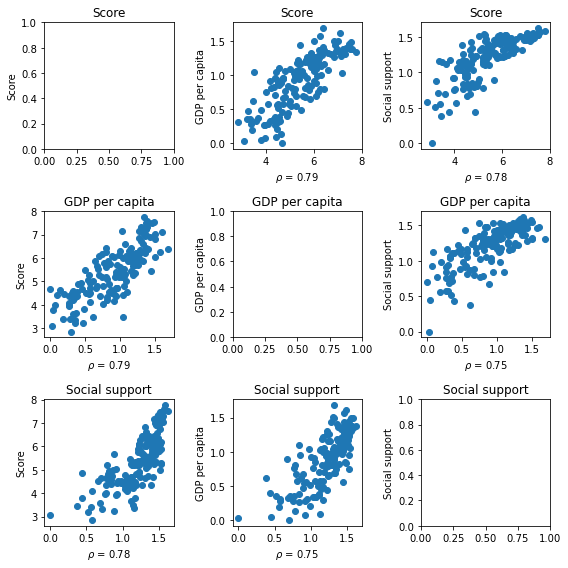

In [272]:
#Test code
#Test 1
cols = ["Score", 
        "GDP per capita", 
        "Social support"]

scatterplot_matrix(cols, figsize = (8,8))

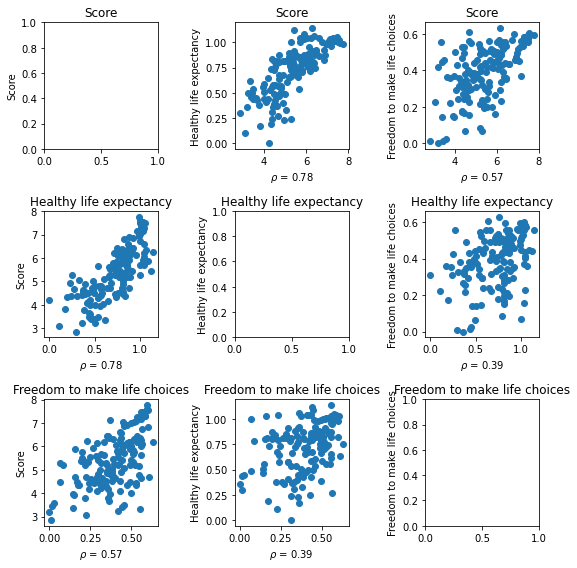

In [278]:
#Test 2
cols = ["Score", 
        "Healthy life expectancy", 
        "Freedom to make life choices"]

scatterplot_matrix(cols, figsize = (8,8))

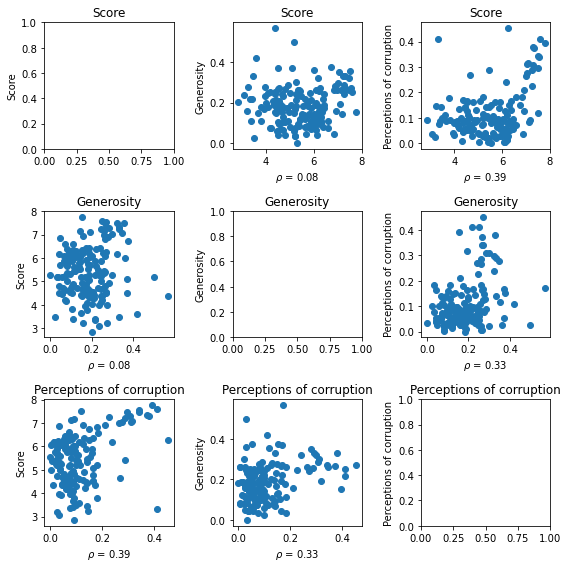

In [275]:
#Test 3
cols = ["Score", 
        "Generosity", 
        "Perceptions of corruption"]

scatterplot_matrix(cols, figsize = (8,8))

Part B
Discussion:
The variables chosen are listed under "columns" above. For test 1, in each graph above (except the diagonals, of course), there is linear shape and a seemingly strong positive correlation between the data sets. As such, each pair of variables above are directly proportional and so, when one increases, so does the other. For test 2, graphs 1 and 3 exhibit 'stronger' linearity whereas graphs 4 and 6 are much more radial as opposed to linear; the remaining 2 graphs have a somewhat linear but also rounded shape, which implies a positive correlation that is neither weak nor strong. In test 3, graphs are much more rounded, and any correlation is difficult to identify. However, a careful perusal of data points suggest that there is an extremely weak but positive correlation between the variables.
More generally, these graphs illustrate a positive association between all the variables and the happiness score. This corresponds with the "World Happiness Report" model by the United Nations (UN), as expected.

Part C
Discussion:
Correlation coefficients are representative of the type of correlation that two variables would have.
In test 1, correlation coefficients are quite high, and therefore highlight that there is a strong correlation between the variables. For test 2, graphs 1 and 3 show relatively higher correlation coefficients (strong positive correlation) whereas graphs 4 and 6 have lower correlation coefficients (weak positive correlation); The remaining 2 graphs have a relatively 'fair' correlation coefficient, which further indicates the aforementioned observations as neither weak nor strong but moreso an in-between positive correlation. The correlation coefficients in test 3 sufficiently justify the observations that there is a very weak but positive correlation between the variables.
All in all, the correlation coefficients more than adequately represent the type of correlation observed.

In [ ]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs. 
Tests, Discussions above.

## Part C

The *correlation coefficient* is a measure of linear correlation between two variables. The correlation coefficient between $X$ and $Y$ is high if $X$ tends to be high when $Y$ is, and vice versa. Correlation coefficients lie in the interval $[-1, 1]$. 

`numpy` provides a function to conveniently compute the correlation coefficient between two or more variables. Find it, and then use it to add "captions" (as horizontal axis labels) to each panel of your plot giving the correlation coefficient between the plotted variables. For example, 

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="https://philchodrow.github.io/PIC16A/homework/scatterplot_matrix_with_cors.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other. Correlation coefficients between 0.70 and 0.84 lie beneath each plot." width="400px">
</figure>

It's not required that you add the Greek letter $\rho$ (the classical symbol for correlation coefficients), but if you do want to, here's how. You can also tweak the rounding as desired.  

```python
ax.set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2)))
```

It's fine to just modify your code from Part B and re-run the examples -- no need for copy/paste. 

Run your code on several different subsets of the columns. Add code cells as needed. Discuss your findings. What positive correlations do you observe? Do they make sense? Are there any negative correlations? Do the quantitative results match what you see "by eye"? 

If you were going to create a model to attempt to predict overall happiness from other indicators, which columns would you use? Why? 

## Problem 3: Plotting Time Series

Run the following code to download two time series data sets: 
- Historical data on the Dow Jones Industrial Average (a composite performance measure of the US stock market), retrieved from Yahoo Finance. 
- Cumulative COVID19 cases over time, from the [New York Times](https://github.com/nytimes/covid-19-data). 

In [198]:
# run this code
# if you get errors, you may need to run the first code block from Problem 2 first. 

import datetime

retrieve_data("https://philchodrow.github.io/PIC16A/datasets/DJI.csv")
DJI = pd.read_csv("data.csv")
DJI['Date'] = pd.to_datetime(DJI['Date'])

retrieve_data("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv")
COVID = pd.read_csv("data.csv")
COVID['date'] = pd.to_datetime(COVID['date'])

## Part A

The series `COVID['cases']` is essentially a `numpy` array containing the cumulative case counts over time. The COVID19 case data  is cumulative, but we would like to see the number of new cases per day (i.e. as in [this kind of plot](https://www.google.com/search?q=covid+stats)). Check the documentation for the `np.diff` function and figure out what it does. Use it appropriately to construct a new array, called `per_day`, giving the number of new cases per day. Then, make a new array called `per_day_date` that gives the appropriate date for each case count. In particular, you will need to ensure that `per_day` and `per_day_date` have the same shape. 

In [282]:
# your solution here
per_day = np.diff(COVID.cases) #Creating per_day from COVID["cases"]
per_day_date = COVID.date[1:] #Creating per_day_date from position 1 onwards from COVID["date"]
per_day.shape, per_day_date.shape #Checking that shapes match

((298,), (298,))

## Part B

Create a figure with two very wide axes, one on top of the other (i.e. two rows, one column). Use the `sharex` argument of `plt.subplots()` to ensure that these two plots will share the same horizontal axis. 

Then: 

1. On the upper axis, plot the Dow Jones Industrial Average over time. For the horizontal axis use `DJI['Date']`; the for the vertical use `DJI['Close']`. 
2. On the lower axis, plot the variables `per_day_date` and `per_day` to visualize the progress of the COVID19 pandemic over time. Use a different color for the trendline. 

Give your plot horizontal and vertical axis labels. 

This problem was simple yet surprisingly complicated for me. I initially misunderstood the instructions and ended up trying to plot the graphs with the same variable as the x-axis. This led to ValueErrors and left me stumped. After reading the question again, I realized that the second plot involved the per_day and per_day_date variables and so, I made changes accordingly.
To me, important time periods included maximums and minimums, and thus, I chose dates to coincide with the gray regions.

Text(0.5, 0.98, 'COVID = BAD')

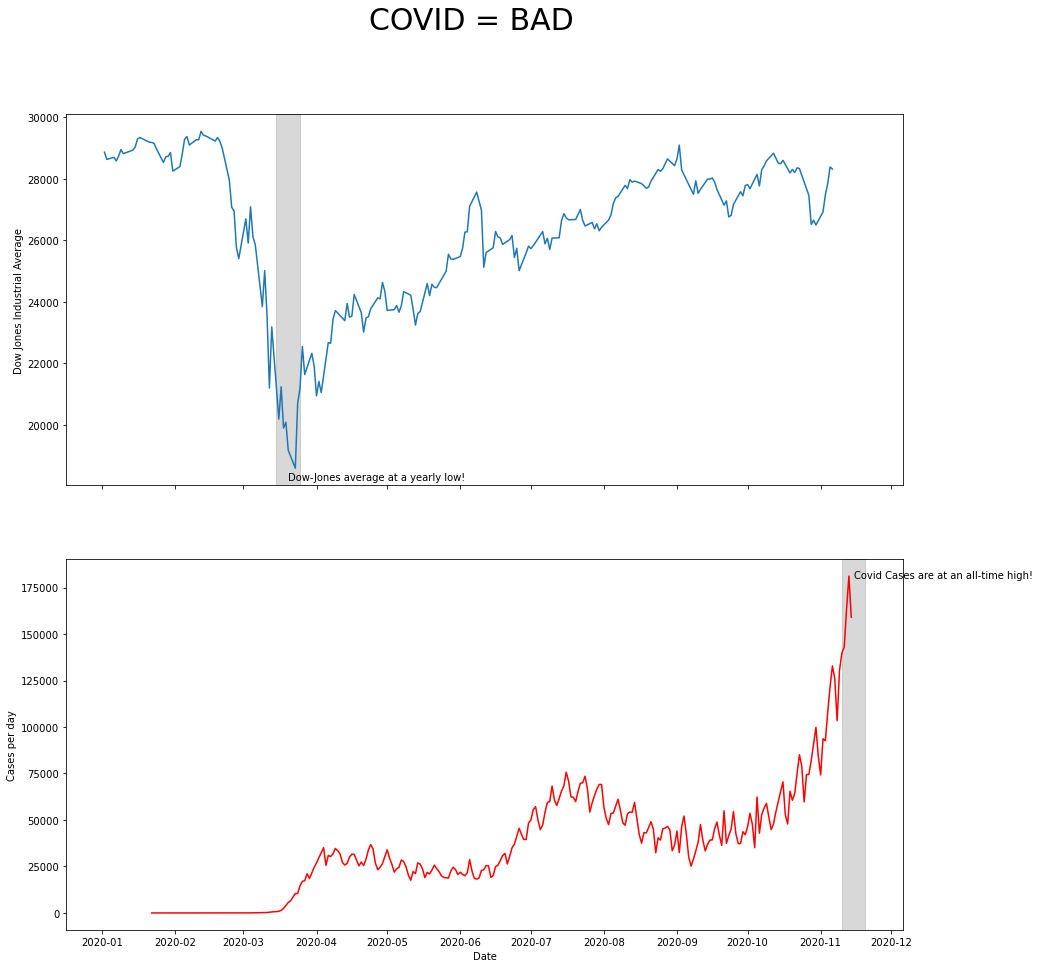

In [300]:
# your plotting code for parts B-E here
#Part B
fig, ax = plt.subplots(2, 1, figsize = (15, 15), sharex = True) #Creating subplots with a common horizontal axis.
#Plotting the two axes
ax[0].plot(DJI.Date, DJI.Close)
ax[1].plot(per_day_date, per_day, color = "red") #Red color for distinction
#Giving appropriate xlabel and ylabel
ax[0].set(ylabel = "Dow Jones Industrial Average") 
ax[1].set(xlabel = "Date", ylabel = "Cases per day")

#Part C
ax[0].axvspan(datetime.datetime(2020,3,15),datetime.datetime(2020,3,25), alpha = .3, color = "gray")
ax[1].axvspan(datetime.datetime(2020,11,10),datetime.datetime(2020, 11,20), alpha = .3, color = "gray")

#Part D
ax[0].text(datetime.datetime(2020,3,20), 18200, "Dow-Jones average at a yearly low!")
ax[1].text(datetime.datetime(2020,11,15), 180000, "Covid Cases are at an all-time high!")

#Part E
fig.suptitle("COVID = BAD", fontsize = 30)

## Part C

The command 

```
ax[0].axvspan(datetime.datetime(2020,6,1),datetime.datetime(2020,6,30), alpha = .3, color = "gray")
```

will add a simple rectangular shade which can be used to highlight specific portions of a time-series. In the given code, this shade runs through the month of June 2020. Add at least two such rectangular shades to your figure corresponding to important time intervals. You can put two shades on one axis, or one on each. If you're not sure what time periods are important, just choose intervals at random. Feel free to modify the color and transparency as desired. You can modify your figure code from Part B -- no need for copy/paste. 

## Part D

The command 

```
ax[0].text(datetime.datetime(2020,9,15), 22000, "penguins?\npenguins!")
```

will add a fun text annotation to your plot, with the first letter in horizontal position corresponding to September 15th, and at vertical position 22,000. Annotate each of your shaded regions with a few words describing their significance. Again, just modify your Part B code. 

## Part E

Add an overall title, spruce up your axis labels, and add anything else you think will make the plot look good. Again, you can just modify your Part B code, without copy/paste. 

Then, submit a job application at www.FiveThirtyEight.com and show Nate Silver your cool data visualization.  